In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

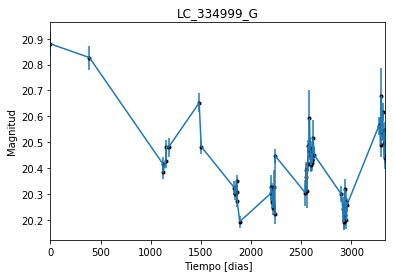

In [2]:
data = np.genfromtxt('LC_334999_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_334999_G')
plt.savefig("LC_334999_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

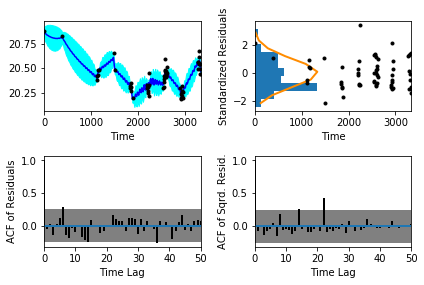

In [5]:
sample.assess_fit()

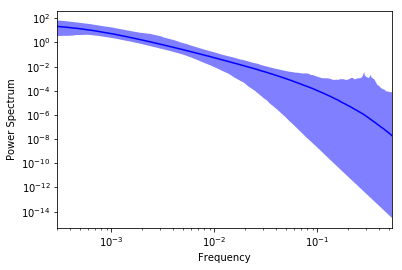

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

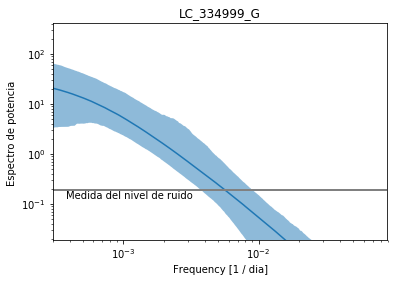

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_334999_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_334999_G')

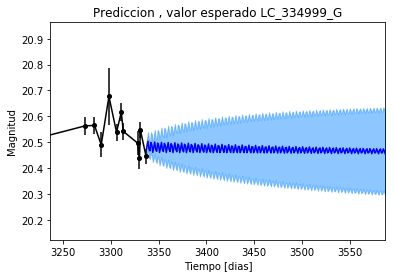

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_334999_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_334999_G')

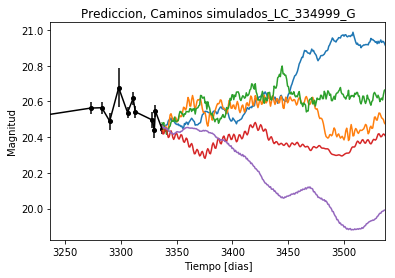

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_334999_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


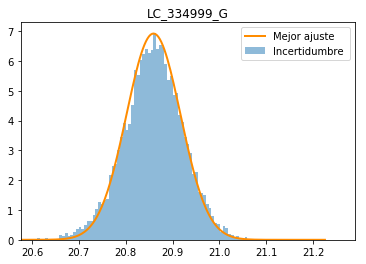

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_334999_G')
plt.savefig("Mejor_ajuste_LC_334999_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_334999_G')

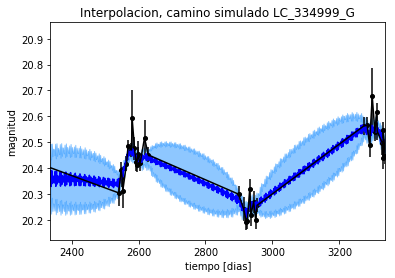

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_G')

Text(0.5,1,'Interpolacion, camino simulado LC_334999_G')

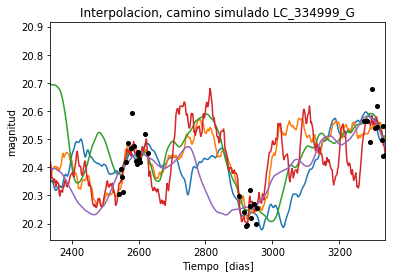

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_334999_G')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 644.277371081
Median: 0.0132658478866
Standard deviation: 0.192079949119
68% credibility interval: [ 0.00140229  0.16893349]
95% credibility interval: [  3.81739635e-04   7.52361887e-01]
99% credibility interval: [  3.20413792e-04   9.87555648e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 690.010888761
Median: 0.00777502295743
Standard deviation: 0.118742838691
68% credibility interval: [ 0.00078192  0.06825078]
95% credibility interval: [  3.44536611e-04   4.35840323e-01]
99% credibility interval: [  3.07829125e-04   8.11948880e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 399.865768624
Median: 0.0888398073992


In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 428.664782731
Median: 98.4336803566
Standard deviation: 2.09799358711
68% credibility interval: [  96.21265832  100.0321208 ]
95% credibility interval: [  93.44218947  101.95320573]
99% credibility interval: [  91.34326144  103.30512413]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 892.56241397
Median: 1.26145497517
Standard deviation: 2.51869267498
68% credibility interval: [ 0.21485351  4.76183805]
95% credibility interval: [ 0.04032543  9.056503  ]
99% credibility interval: [  0.0185939  12.2560206]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 766.465891081
Median: 3.29439082232
Standard deviation: 12.7188431559
68% credibility interval: [  0.24770658  19.17953408]
95% credibility interval: [  1.44196753e-02

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4379.27626874
Median: 2.82486559688e-47
Standard deviation: 6.79653006042e+138
68% credibility interval: [  3.98258592e-113   1.43545757e-010]
95% credibility interval: [  6.15879191e-144   3.55507638e+064]
99% credibility interval: [  2.68027444e-190   2.81623153e+120]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1613.00783154
Median: 20.5112966562
Standard deviation: 0.101855711034
68% credibility interval: [ 20.41876179  20.60819727]
95% credibility interval: [ 20.31904831  20.71913054]
99% credibility interval: [ 20.21737674  20.79013022]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 575.131088725
Median: 0.213723173238
Standard deviation: 0.290353839085
68% credibility interval: [ 0.          0.64684954]
95% credibility interval: [ 0.          0.96665063]
99% credibility interval: [ 0.          1.04153515]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 575.131088725
Median: 0.213723173238
Standard deviation: 0.290353839085
68% credibility interval: [ 0.          0.64684954]
95% credibility interval: [ 0.          0.96665063]
99% credibility interval: [ 0.          1.04153515]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1676.0388976
Median: 0.0
Standard deviation: 0.000366452169892
68% credi

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 428.664782731
Median: 98.4336803566
Standard deviation: 2.09799358711
68% credibility interval: [  96.21265832  100.0321208 ]
95% credibility interval: [  93.44218947  101.95320573]
99% credibility interval: [  91.34326144  103.30512413]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1791.99162895
Median: 0.0438628887118
Standard deviation: 0.0329529116842
68% credibility interval: [ 0.0296622   0.06808738]
95% credibility interval: [ 0.02075834  0.12433671]
99% credibility interval: [ 0.0169758   0.20512768]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 542.592878382
Median: 1.22543211826
Standard deviation: 0.232511773286
68% credibility interval: [ 1.00784054  1.47099855]
95% credibility interval: [ 0.81993472  1.73372786]
99% credibility interval: [ 0.73585268  1.89716577]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 871.098600375
Median: 0.0135674767944
Standard deviation: 0.378377605404
68% credibility interval: [  1.99114802e-04   2.14487369e-01]
95% credibility interval: [  3.39838281e-67   1.20645618e+00]
99% credibility interval: [  8.91970464e-124   2.34864897e+000]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 644.277371081
Median: (-0.0833517805285-2.00026569643j)
Standard deviation: 2.1874154914
68% credibility interval: [-1.06144042-0.3376228j  -0.00881088-2.96105635j]
95% credibility interval: [ -4.72722915e+00+0.j          -2.39854087e-03-1.06343666j]
99% credibility interval: [ -6.20499514e+00+0.j          -2.01321923e-03-2.85310553j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 690.010888761
Median: (-0.0488519100091+0.469561047053j)
Standard deviation: 1.97101043057
68% credibility interval: [-0.42883228+1.29951498j -0.00491295+2.71954369j]
95% credibility interval: [ -2.73846551e+00+0.j          -2.16478737e-03+0.08218538j]
99% credibility interval: [ -5.10162528e+00+6.12802092j  -1.93414743e-03+0.82211321j]
Post